# MLP

MLP implementation with Tensorflow.

Sources:
https://towardsdatascience.com/multi-layer-perceptron-using-tensorflow-9f3e218a4809, https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/

## Dependencies

In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
import matplotlib.pyplot as plt

C:\Users\yctan\.conda\envs\ML\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load dataset
Load mnist data with keras, split into train and test data (read up on mnist dataset). Pixel values will be normalized.

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
# normalize pixel values
X_train = X_train.astype(float) / 255.
X_test = X_test.astype(float) / 255.

## Visualize dataset

In [3]:
print('Feature matrix:', X_train.shape)
print('Target matrix:', X_test.shape)
print('Feature matrix:', y_train.shape)
print('Target matrix:', y_test.shape)

Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


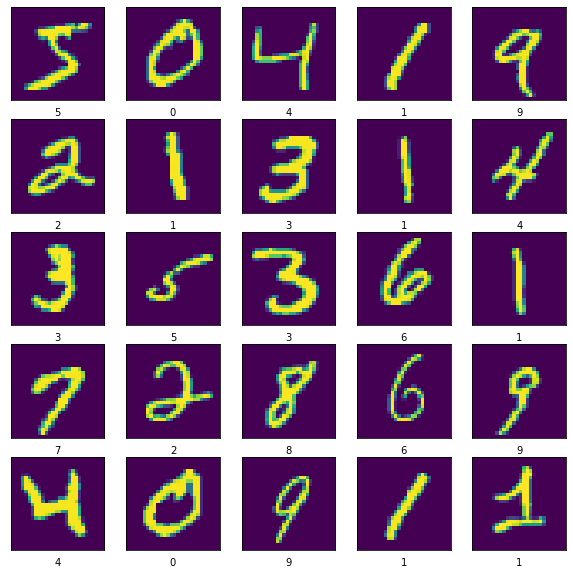

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i])
plt.show()

## Create our model
Create our model (784 * 512 * 256 * 10), 2 hidden layers each with droput layers attached and an output layer (softmax).

In [5]:
model = Sequential([
    # reshape 28 row * 28 column data to 28*28 rows
    Flatten(input_shape=(28, 28)),
    # dense layer 1
    Dense(512, activation='relu'),
    Dropout(.2),
    # dense layer 2
    Dense(256, activation='relu'),
    Dropout(.2),
    # output layer
    Dense(10, activation='softmax'),
])

## Complete model
Compile with optimizer (Adam, SGD etc) and loss calculation (MSE etc)

In [6]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

## Train
epoch: how many times to do the batch training

batch: number of samples per epoch, next epoch trains on the next batch_size of data i.e. staircase

validation_split: how much of the training data to be used for loss evaluation (model will not be trained on this data)

In [7]:
history = model.fit(X_train, y_train, 
          epochs=10, 
          batch_size=600, 
          validation_split=0.2)

Epoch 1/10
80/80 [==============================] - 3s 29ms/step - loss: 0.4960 - accuracy: 0.8562 - val_loss: 0.1885 - val_accuracy: 0.9461
Epoch 2/10
80/80 [==============================] - 3s 34ms/step - loss: 0.1832 - accuracy: 0.9454 - val_loss: 0.1316 - val_accuracy: 0.9622
Epoch 3/10
80/80 [==============================] - 2s 27ms/step - loss: 0.1262 - accuracy: 0.9622 - val_loss: 0.1092 - val_accuracy: 0.9675
Epoch 4/10
80/80 [==============================] - 2s 24ms/step - loss: 0.0943 - accuracy: 0.9717 - val_loss: 0.0953 - val_accuracy: 0.9723
Epoch 5/10
80/80 [==============================] - 2s 24ms/step - loss: 0.0758 - accuracy: 0.9764 - val_loss: 0.0841 - val_accuracy: 0.9749
Epoch 6/10
80/80 [==============================] - 2s 23ms/step - loss: 0.0612 - accuracy: 0.9818 - val_loss: 0.0761 - val_accuracy: 0.9771
Epoch 7/10
80/80 [==============================] - 2s 26ms/step - loss: 0.0507 - accuracy: 0.9841 - val_loss: 0.0749 - val_accuracy: 0.9778
Epoch 8/10
80

## Evaluate

accuracy: training data accuracy

val_accuracy: validation split accuracy

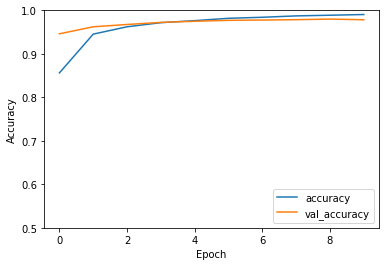

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Results

In [11]:
results = model.evaluate(X_test, y_test, verbose=0)
print('test loss, test acc:', results)

test loss, test acc: [0.0666138082742691, 0.9801999926567078]


## Results analysis
512 * 256, batch_size 2000, no dropouts: 0.9745

512 * 256, batch_size 1000, no dropouts: 0.9785

512 * 256, batch_size 800, no dropouts: 0.9789

512 * 256, batch_size 800, dropout .2: 0.9803

512 * 256, batch_size 600, dropout .2: 0.9819

512 * 256 * 256, batch_size 600, dropout .2: 0.9822